In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("train.csv")


In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [ ]:
new_df = df.sample(30000, random_state=2)

In [7]:
new_df.shape

(30000, 6)

In [8]:
new_df.describe()

,id,qid1,qid2,is_duplicate
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,202411.998933,216685.498633,221520.533000,0.366233
std,116730.715713,157776.920012,159768.171418,0.481782
min,3.000000,7.000000,8.000000,0.000000
25%,101702.000000,74504.250000,76293.000000,0.000000
50%,202278.000000,191647.000000,198490.500000,0.000000
75%,303515.250000,345192.500000,355006.750000,1.000000
max,404279.000000,537920.000000,537921.000000,1.000000


In [ ]:
new_df.isnull().sum()  # checking for null values

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.duplicated().sum()  # checking for duplicate values

0

In [ ]:
print(new_df["is_duplicate"].value_counts())
print((new_df["is_duplicate"].value_counts() / new_df["is_duplicate"].count()) * 100)


is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


In [15]:
qid = pd.Series(new_df["qid1"].tolist() + new_df["qid2"].tolist())
print("Total number of unique questions", np.unique(qid).shape[0])

x = qid.value_counts() > 1
print("Number of questions getting repeated", x[x].shape[0])


Total number of unique questions 55299
Number of questions getting repeated 3480


In [ ]:
# feature Engineering --> need to create new features
new_df["q1_len"] = new_df["question1"].str.len()
new_df["q2_len"] = new_df["question2"].str.len()

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [20]:
new_df["q1_num_words"] = new_df["question1"].apply(lambda x: len(x.split()))
new_df["q2_num_words"] = new_df["question2"].apply(lambda x: len(x.split()))

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,9


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split()))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split()))
    return len(w1 & w2)


In [23]:
new_df["common_words"] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,q1_num_words,q2_num_words,common_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,9,3


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split()))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split()))
    return len(w1) + len(w2)

In [25]:
new_df["total_words"] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,q1_num_words,q2_num_words,common_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,9,3,13


In [28]:
new_df["word_share"] = new_df["common_words"] / new_df["total_words"]
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,12,0.458333,24,0.019097
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,12,15,0.304348,23,0.013233
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,25,17,0.058824,34,0.001730
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,12,30,0.000000,32,0.000000
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,9,0.230769,13,0.017751


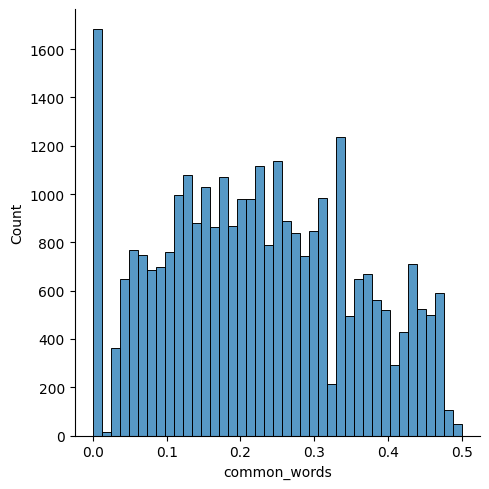

In [29]:
sns.displot(new_df["common_words"])
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df["question1"]) + list(ques_df["question2"])

cv = CountVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)


In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

NameError: name 'ques_df' is not defined